In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1) iris.csv to 1) iris.csv
User uploaded file "1) iris.csv" with length 3858 bytes


In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame
# Assuming the uploaded file is '1) iris.csv'
df = pd.read_csv('1) iris.csv')

# Separate features (X) by dropping the 'species' column
X = df.drop('species', axis=1)

print("--- Original Data Head (Features) ---")
display(X.head())

--- Original Data Head (Features) ---


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Scaled Data Head ---")
display(X_scaled[:5])

--- Scaled Data Head ---


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

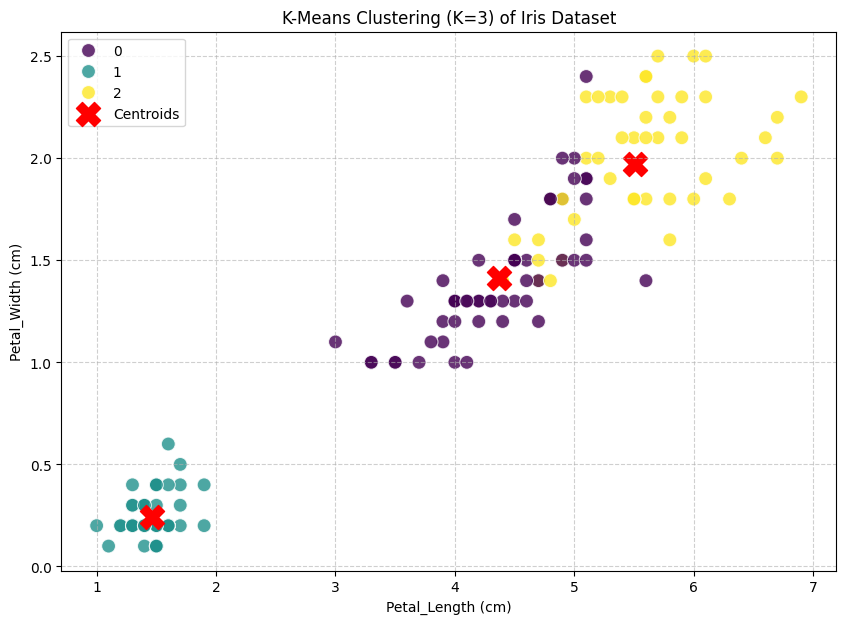


--- Cluster Summary (Count of Data Points per Cluster) ---
Cluster
0    53
1    50
2    47
Name: count, dtype: int64

--- Final Centroids (in Original Feature Scale) ---
   sepal_length  sepal_width  petal_length  petal_width
0      5.801887     2.673585      4.369811     1.413208
1      5.006000     3.418000      1.464000     0.244000
2      6.780851     3.095745      5.510638     1.972340


In [8]:
# 1. Train the K-Means model with the optimal K=3
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Get the cluster labels for each data point
clusters = final_kmeans.fit_predict(X_scaled)

# Add the cluster results back to the original DataFrame
df['Cluster'] = clusters

# Get the coordinates of the final cluster centroids (in the scaled space)
centroids = scaler.inverse_transform(final_kmeans.cluster_centers_)

# 2. Visualize the Clusters

# Define features for the plot
x_feature = 'petal_length'
y_feature = 'petal_width'

plt.figure(figsize=(10, 7))

# Scatter plot the data points, colored by their assigned cluster
sns.scatterplot(
    x=x_feature,
    y=y_feature,
    data=df,
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.8,
    legend='full'
)

# Plot the cluster centroids
plt.scatter(
    centroids[:, X.columns.get_loc(x_feature)], # Centroid x-coordinate
    centroids[:, X.columns.get_loc(y_feature)], # Centroid y-coordinate
    marker='X',
    s=300,
    color='red',
    label='Centroids'
)

plt.title('K-Means Clustering (K=3) of Iris Dataset')
plt.xlabel(f'{x_feature.title()} (cm)')
plt.ylabel(f'{y_feature.title()} (cm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Print a summary of the clustering results
print("\n--- Cluster Summary (Count of Data Points per Cluster) ---")
print(df['Cluster'].value_counts())

print("\n--- Final Centroids (in Original Feature Scale) ---")
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print(centroids_df)